In [1]:
# the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys
sys.path.append('../codes')
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import torch
import random

import numpy as np

from pycocotools.coco import COCO

from detectron2.data.datasets import load_coco_json, register_coco_instances
from detectron2.data import get_detection_dataset_dicts
from detectron2.structures.boxes import Boxes, BoxMode, pairwise_iou
import seaborn as sns
from utils.img_utils import add_bboxes_on_image
from utils.register_datasets import register_mosquitoes

In [5]:
#make matplotlib figures appear inline in the notebook
#rather than in a new window.
%matplotlib inline
sns.set()
# # set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20

sns.set_context('paper', font_scale=2, 
                rc={'lines.linewidth': 2,
                    'text.usetex' : True,
                    'image.interpolation': 'nearest',
                    'image.cmap': 'gray',
                    'figure.figsize': (12.0, 10.0)})
sns.set_style(style='white')
sns.set_palette('colorblind', color_codes=True)


In [6]:
def check_annot(indexes):
    
    for img_ind in indexes:
        sample = data[img_ind]
        
        img = Image.open(sample['file_name'])
        targets = sample['annotations']
        idx = sample['image_id']  
        
        bbs_gt = (torch.tensor([d['bbox'] for d in targets])) 
        
        if len(bbs_gt):
            bbs_gt = BoxMode.convert(bbs_gt, BoxMode.XYWH_ABS, BoxMode.XYXY_ABS)
            img_bbox = add_bboxes_on_image(np.array(img), bbs_gt, color=(0, 0, 255))
               
        
#         img_bbox = add_bboxes_on_image(np.array(img), target.bbox, color=(255,0,0))
        # plot image
        plt.imshow(img_bbox)
        plt.show()        

In [12]:
# root = '../data/_under_construction'
# method = ''
# dataset = method+'fold1_set_4'

# try:
#     register_coco_instances(
#     name=dataset,
#     metadata={},
#     json_file=os.path.join(root, method, 'coco_format_'+dataset+'.json'),    
#     image_root=os.path.join(root, method, 'frames'),    
#     )
# except AssertionError:
#     print(f'{dataset} dataset already registered')

In [10]:
register_mosquitoes()

AssertionError: Dataset 'mbg_train' is already registered!

In [14]:
dataset = 'mbg_lum_blurblend_fold0_set_1'
data = get_detection_dataset_dicts([dataset], filter_empty=True)
data[127]


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



{'file_name': '/nfs/home/wesley.passos/repos/mosquitoes-wes/codes/utils/../../data/data_aug/lum_blurblend/rectfied_DJI_0018/frame_0810.png',
 'height': 2160,
 'width': 3840,
 'image_id': 1320,
 'annotations': [{'iscrowd': 0,
   'bbox': [288, 1805, 179, 129],
   'category_id': 0,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

[237, 191, 286]


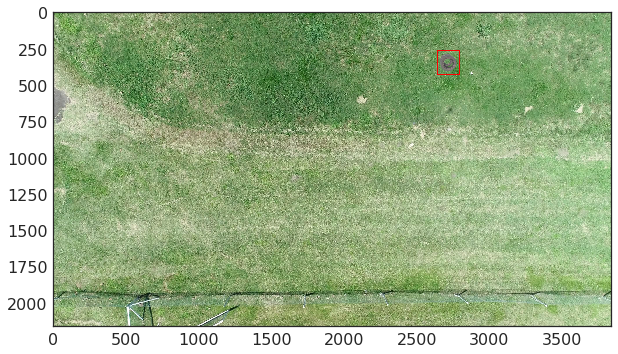

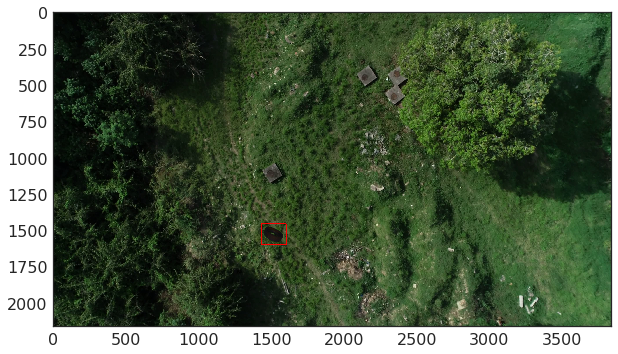

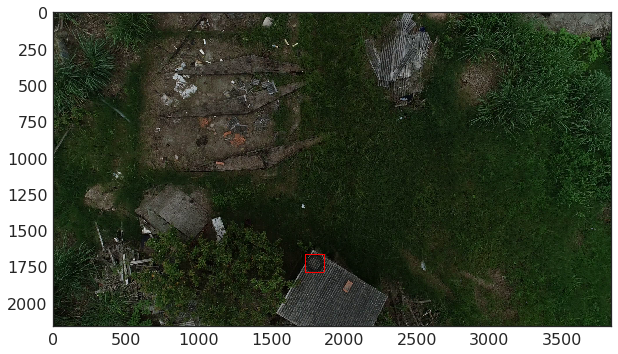

In [22]:
indexes = random.sample(np.arange(0, len(data)+1).tolist(), 3)
print(indexes)
check_annot(indexes)

In [23]:
def get_dataset_bboxes_areas(data):
    areas = []
    for img in data:
        for ann in img['annotations']:
            areas.append(np.prod(ann['bbox'][-2:]))
            
    return areas

In [24]:
dataset = 'mbg_fold0_set_1'
data = get_detection_dataset_dicts([dataset], filter_empty=True)
areas = get_dataset_bboxes_areas(data)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.




Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



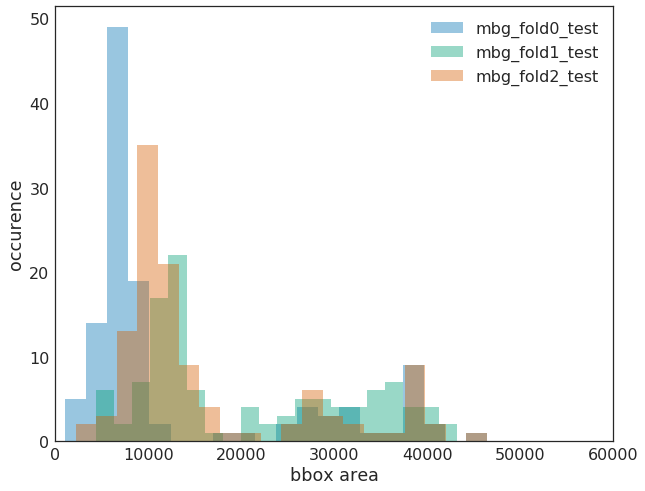

In [25]:
datasets = ['mbg_fold0_test',
           'mbg_fold1_test',
           'mbg_fold2_test']

areas = {}
plt.figure()
for dataset in datasets:
    data = get_detection_dataset_dicts([dataset], filter_empty=True)
    areas[dataset] = get_dataset_bboxes_areas(data)
    
    
    sns.distplot(areas[dataset], kde=False, rug=False, bins=20)
    plt.xlabel('bbox area')
    plt.ylabel('occurence')

plt.xlim([0, 60000])
plt.legend(datasets)
plt.show()
    


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



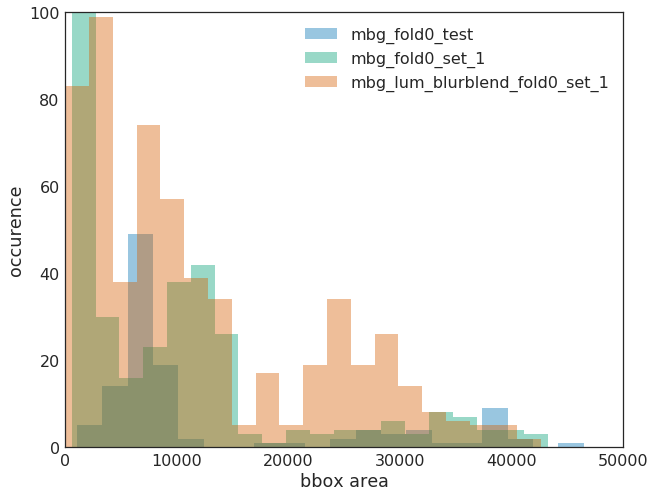


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



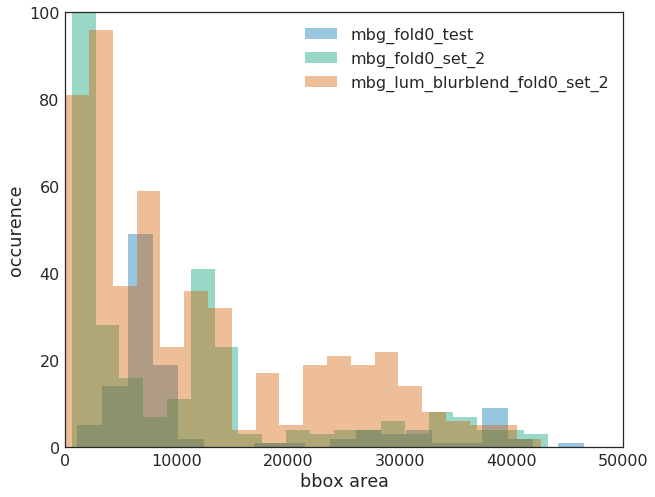


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



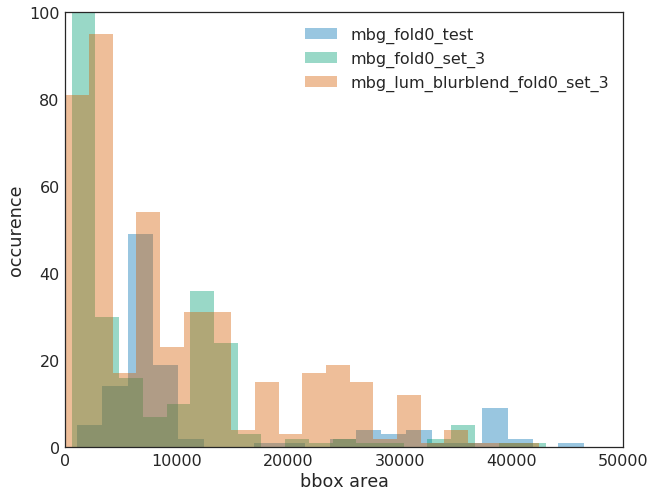


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



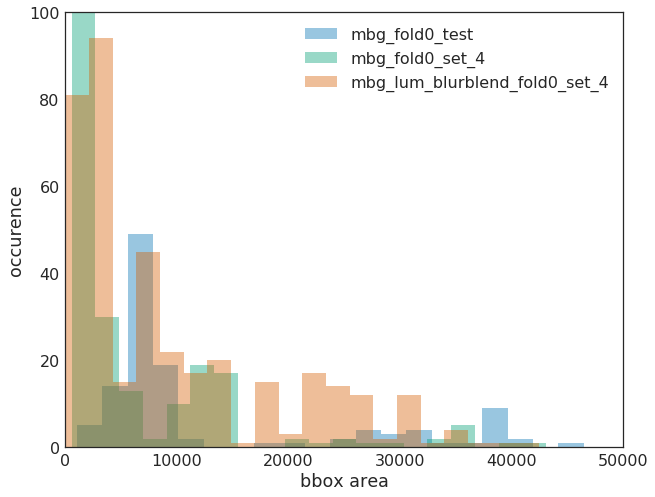


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



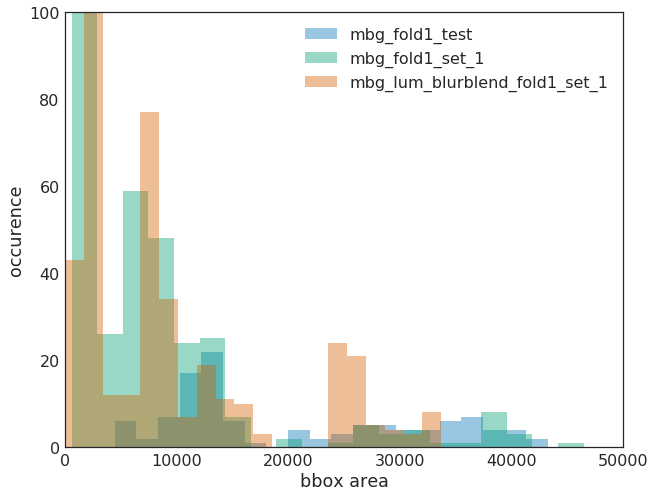


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



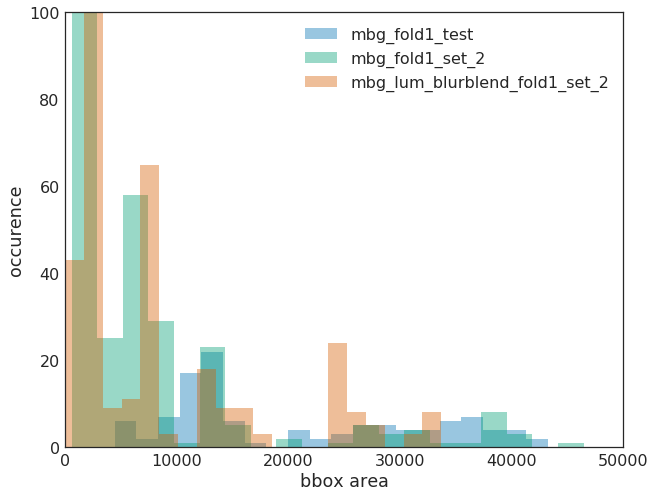


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



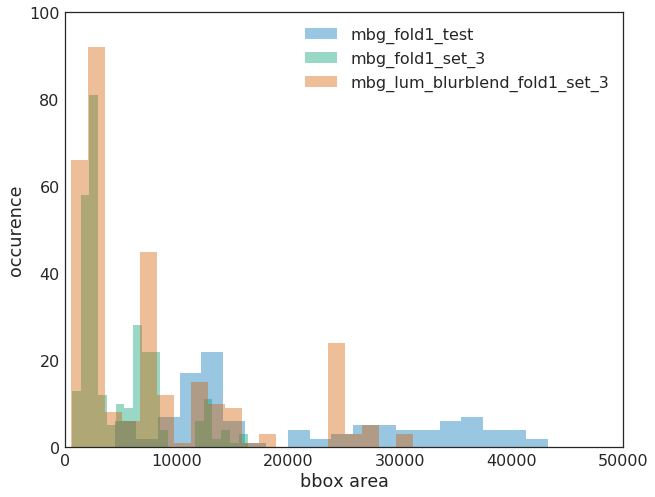


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



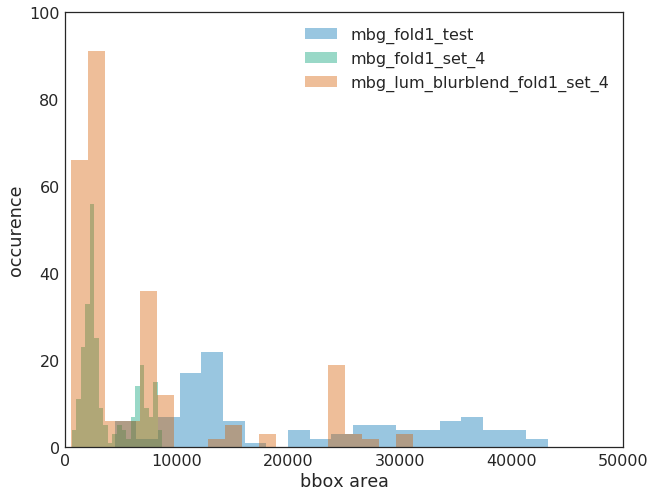


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



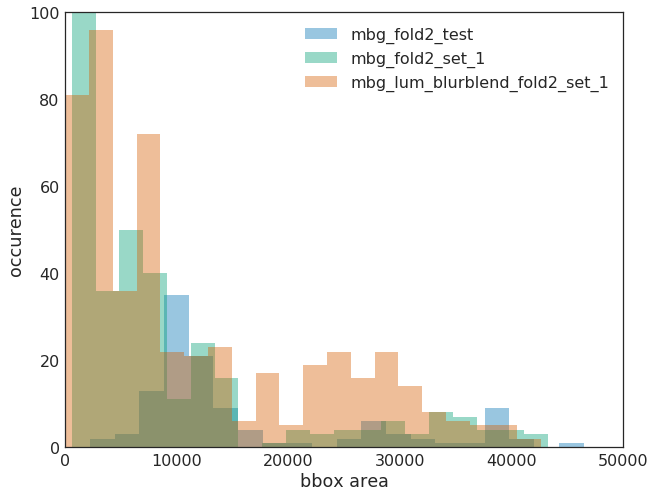


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



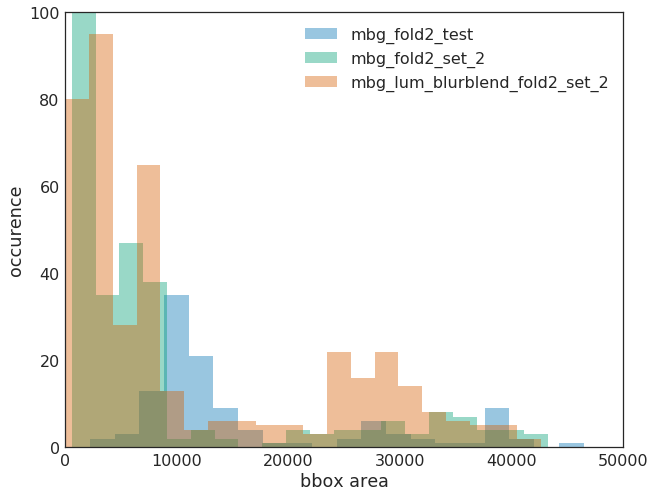


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



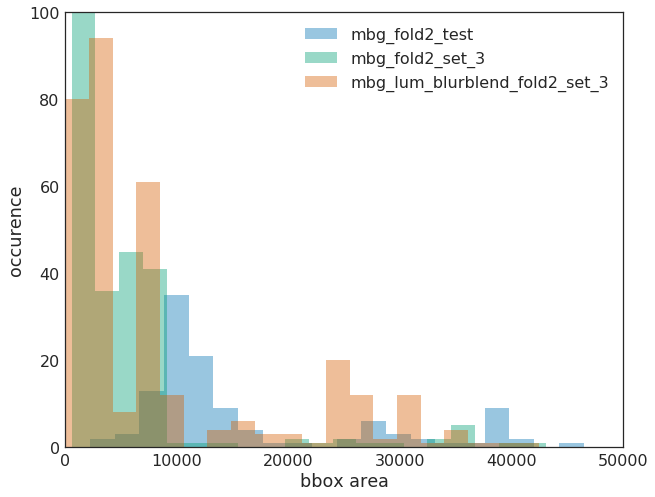


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



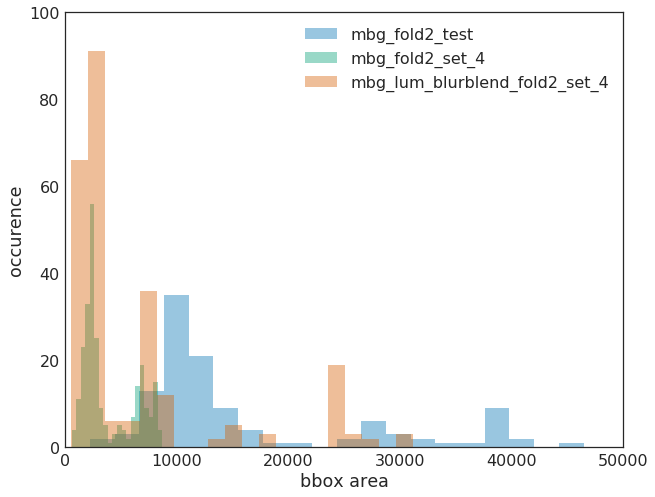

In [28]:
for k in np.arange(3):
    for s in np.arange(4):
        
        datasets = [
            f'mbg_fold{k}_test',
            f'mbg_fold{k}_set_{s+1}',
            f'mbg_lum_blurblend_fold{k}_set_{s+1}',
            
           ]
        
        plt.figure()
        
        for dataset in datasets:
            data = get_detection_dataset_dicts([dataset], filter_empty=True)
            areas[dataset] = get_dataset_bboxes_areas(data)            
            
            sns.distplot(areas[dataset], kde=False, rug=False, bins=20)
            
            
        plt.xlabel('bbox area')
        plt.ylabel('occurence')
        
        plt.xlim([0, 50000])
        plt.ylim([0, 100])

        plt.legend(datasets)
        plt.show()       
        